# Análise exploratória de dados

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## 1. Descrição dos dados

In [2]:
diamonds = pd.read_csv('../data/raw/data.csv')
print("\nPrimeiras linhas do conjunto de dados:")
diamonds.head()


Primeiras linhas do conjunto de dados:


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


### Obtendo informações gerais sobre o DataFrame:

In [3]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


### Estatísticas descritivas:

In [4]:
diamonds.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


### Valores únicos presentes nas colunas categóricas:

In [5]:
print("\nValores únicos para as colunas 'cut', 'color' e 'clarity':")
print(diamonds['cut'].unique())
print(diamonds['color'].unique())
print(diamonds['clarity'].unique())


Valores únicos para as colunas 'cut', 'color' e 'clarity':
['Ideal' 'Premium' 'Good' 'Very Good' 'Fair']
['E' 'I' 'J' 'H' 'F' 'G' 'D']
['SI2' 'SI1' 'VS1' 'VS2' 'VVS2' 'VVS1' 'I1' 'IF']


### Quantidade de valores faltantes:

In [6]:
print("\nQuantidade de valores faltantes por variável:")
print(diamonds.isnull().sum())


Quantidade de valores faltantes por variável:
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64


### Tipos de variáveis:

In [7]:
diamonds.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object

### Dicionário de dados:

In [8]:
dictionary = pd.read_csv('../data/external/dictionary.csv')
dictionary

,variavel,descricao,tipo,subtipo
0,carat,Peso do diamante (0.2--5.01),quantitativa,contínua
1,cut,"Qualidade do corte (Fair, Good, Very Good, Pre...",qualitativa,ordinal
2,color,"Cor do diamante, de D (melhor) a J (pior)",qualitativa,ordinal
3,clarity,"Medida de quão claro é o diamante (I1 (pior), ...",qualitativa,ordinal
4,depth,Percentual de profundidade total = z / média(x...,quantitativa,contínua
5,table,Largura do topo do diamante em relação ao pont...,quantitativa,contínua
6,price,"Preço em dólares americanos (US$326--US$18,823)",quantitativa,contínua
7,x,Comprimento em mm (0--10.74),quantitativa,contínua
8,y,Largura em mm (0--58.9),quantitativa,contínua
9,z,Profundidade em mm (0--31.8),quantitativa,contínua


## 2. Perguntas de partida e hipóteses

### - Qual a correlação das variáveis quantitativas com os preços dos diamantes?
  - **Hipótese**: Variáveis como peso (carat) e dimensões (x,y e z) possuem alta relevância no preço.

### - Qual é a relação entre o peso (carat), comprimento (x), kargura (y) e profundidade (z) com o preço dos diamantes?
  - **Hipótese**: Diamantes maiores tendem a ter um preço mais elevado.
  
### - Qual é a distribuição das diferentes qualidades de corte (cut) entre os diamantes e como a qualidade do corte afeta o preço dos diamantes?
-   **Hipótese:** A maioria dos diamantes possui cortes de qualidade média a boa (Good, Very Good) e cortes de qualidade superior (Ideal, Premium) têm preços mais altos.

### - Existe uma correlação entre a cor do diamante e seu preço?
-   **Hipótese:** Diamantes com cores melhores (próximas a D) são mais caros.

### - Como a clareza (clarity) influencia o preço dos diamantes?
-   **Hipótese:** Diamantes com maior clareza (mais próximos de IF) são mais caros


### Antes de iniciar a busca por respostas, irei ordenar as variáveis qualitativas das "piores" para as "melhores" para facilitar as visualizações nos gráficos:

In [9]:
# Definir a ordem das categorias de 'cut' do pior para o melhor
ordem_cut = ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']
diamonds['cut'] = pd.Categorical(diamonds['cut'], categories=ordem_cut, ordered=True)

# Definir a ordem das categorias de 'color' do pior para o melhor
ordem_color = ['J', 'I', 'H', 'G', 'F', 'E', 'D']
diamonds['color'] = pd.Categorical(diamonds['color'], categories=ordem_color, ordered=True)

# Definir a ordem das categorias de 'clarity' do pior para o melhor
ordem_clarity = ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']
diamonds['clarity'] = pd.Categorical(diamonds['clarity'], categories=ordem_clarity, ordered=True)

### Pergunta 1: Correlação entre variáveis quantitativas e o preço do diamante:

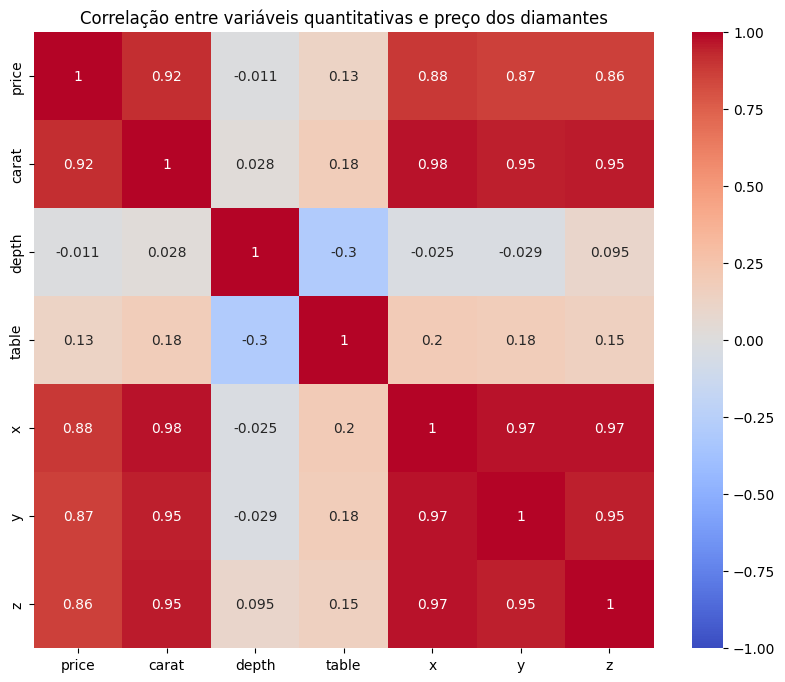

In [10]:
quantitative_vars = ['price', 'carat', 'depth', 'table', 'x', 'y', 'z']
correlation_matrix = diamonds[quantitative_vars].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlação entre variáveis quantitativas e preço dos diamantes')
plt.show()

Ao observar o gráfico, é possível notar que as variáveis quantitativas com maior influência no valor do diamante são as que estão relacionadas ao tamanho do mesmo, ou seja, peso (carat) e as variáveis ligadas as dimensões (x, y e z). O que pode significar que pedras maiores possuem um maior valor.

### Pergunta 2: Relação entre o peso, comprimento, largura e profundidade com o preço dos diamantes:

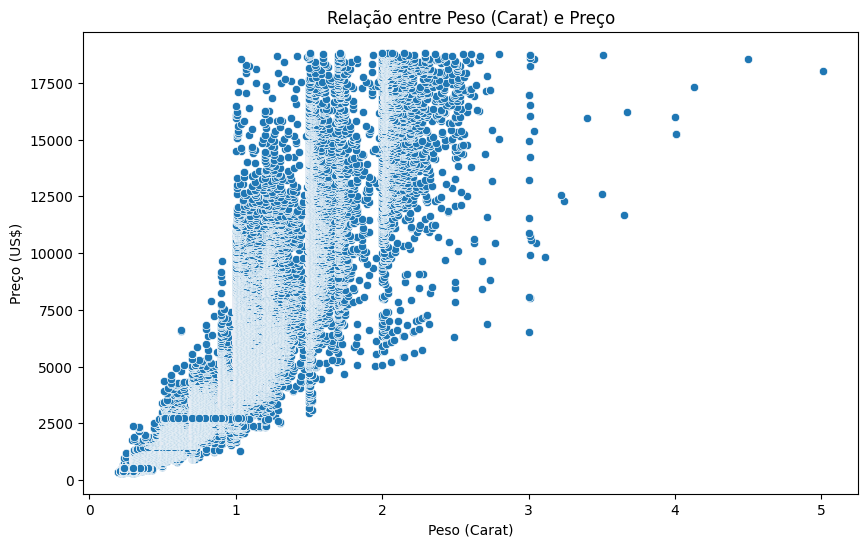

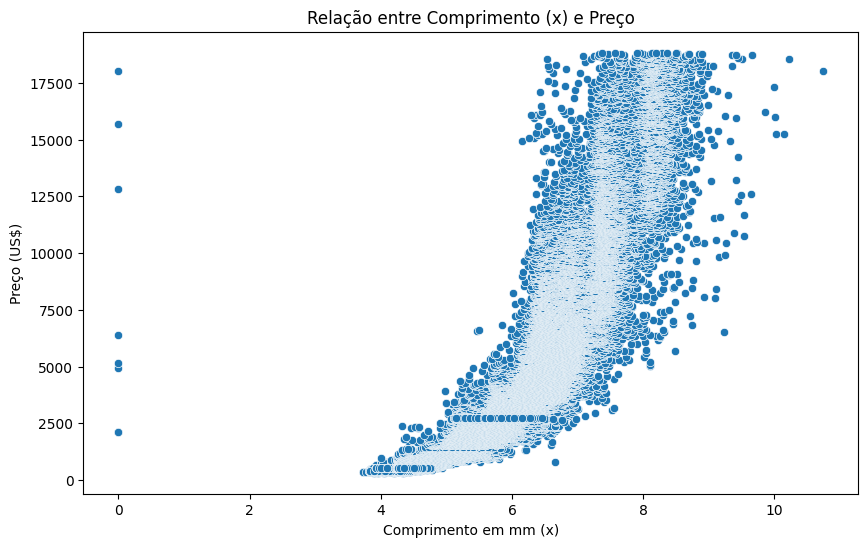

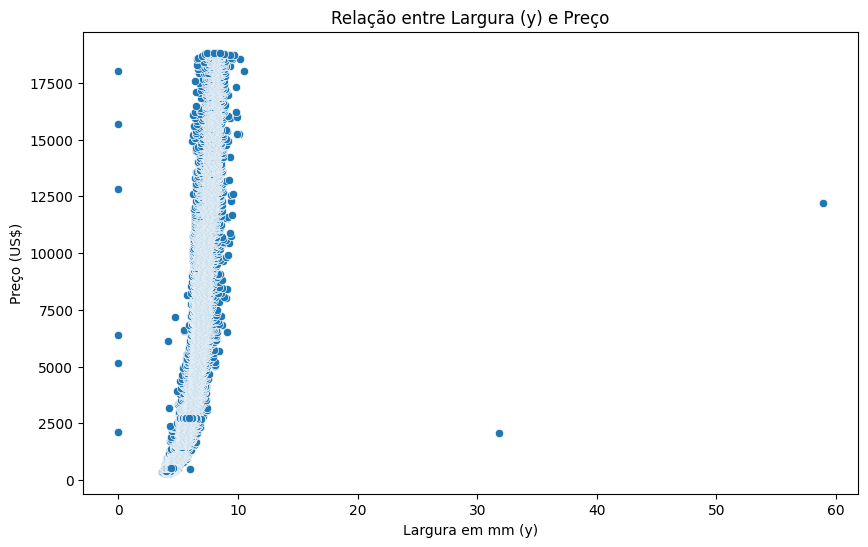

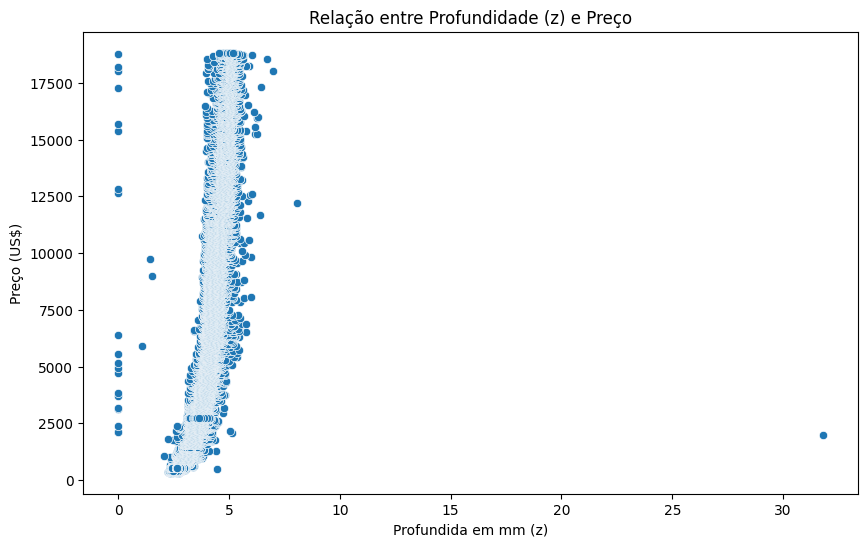

In [11]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='carat', y='price', data=diamonds)
plt.title('Relação entre Peso (Carat) e Preço')
plt.xlabel('Peso (Carat)')
plt.ylabel('Preço (US$)')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='x', y='price', data=diamonds)
plt.title('Relação entre Comprimento (x) e Preço')
plt.xlabel('Comprimento em mm (x)')
plt.ylabel('Preço (US$)')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='y', y='price', data=diamonds)
plt.title('Relação entre Largura (y) e Preço')
plt.xlabel('Largura em mm (y)')
plt.ylabel('Preço (US$)')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='z', y='price', data=diamonds)
plt.title('Relação entre Profundidade (z) e Preço')
plt.xlabel('Profundida em mm (z)')
plt.ylabel('Preço (US$)')
plt.show()

- Há uma correlação positiva evidente entre o peso do diamante (carat) e o preço. À medida que o peso das pedras de diamante aumentam, o preço tende a aumentar. Isso confirma a hipótese de que diamantes mais pesados são mais caros. 
- Para a variável de comprimento, também é notada uma forte relação. À medida que o comprimento aumenta os preços possuem uma tendência de aumento.
- Para as variáveis de largura e profundidade a visualização ficou prejudicada devido a outliers, deixando a maioria das plotagem em um curto intervalo.
- Relacionado a outliers, nas variáveis x,y e z há valores atibuídos como 0 para as variáveis, o que pode significar que na verdade, são valores desconhecidos.
- É necessário considerar outros fatores que podem influenciar o preço, como a qualidade do corte, a cor e a clareza, e ver como eles interagem com o peso e o preço dos diamantes.

### Pergunta 3: Distribuição das qualidades de corte (cut) e como essa qualidade afeta o preço diamante:

In [12]:
cut_counts = diamonds['cut'].value_counts().reset_index()
cut_counts.columns = ['cut', 'n']
cut_counts

,cut,n
0,Ideal,21551
1,Premium,13791
2,Very Good,12082
3,Good,4906
4,Fair,1610


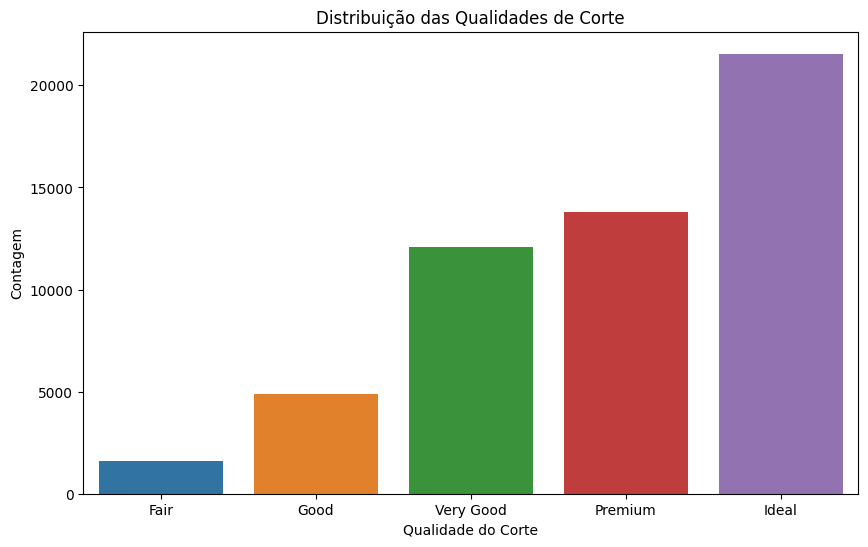

In [13]:
plt.figure(figsize=(10, 6))
sns.countplot(x='cut', data=diamonds)
plt.title('Distribuição das Qualidades de Corte')
plt.xlabel('Qualidade do Corte')
plt.ylabel('Contagem')
plt.show()

O melhor corte (Ideal) é o que apresenta mais registros na base de dados, enquanto o pior (Fair) apresenta menos.

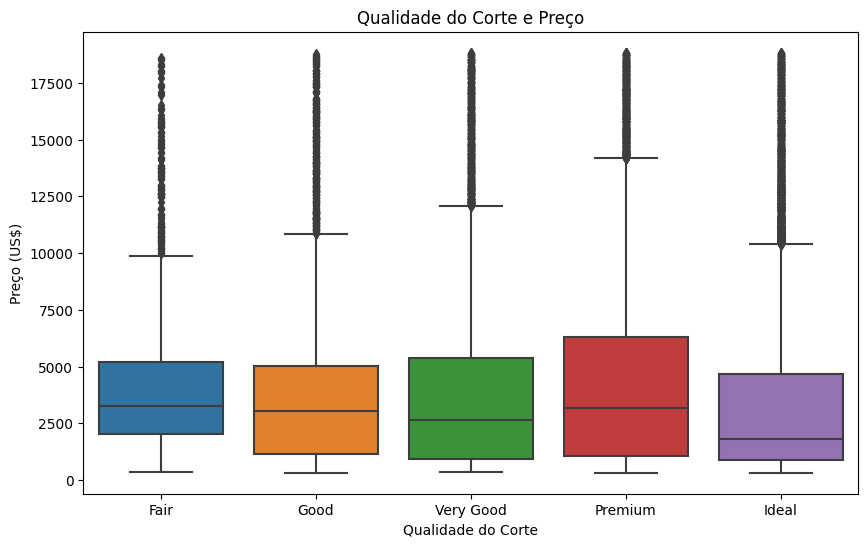

In [14]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='cut', y='price', data=diamonds)
plt.title('Qualidade do Corte e Preço')
plt.xlabel('Qualidade do Corte')
plt.ylabel('Preço (US$)')
plt.show()

#### Ao analisar o gráfico é possível deduzir as seguintes observações:
- As medianas dos preços são bastante próximas entre si para as qualidades de corte: Fair, Good, Very Good e Premium, com todas ficando acima de 2500. No entanto, a mediana é ligeiramente maior para cortes de qualidade Premium, a surpresa foi a mediana do melhor corte (Ideal) ter sido o menor.
- Há muitos outliers em todas as categorias de corte, o que indica que existem diamantes com preços excepcionalmente altos em cada categoria.
- Podemos afirmar que a qualidade de corte não possui tanta influência no preço final do diamante já que o corte ideal possui uma caixa menor que todos os outros cortes.

### Pergunta 4: Cor do diamante e seu preço:

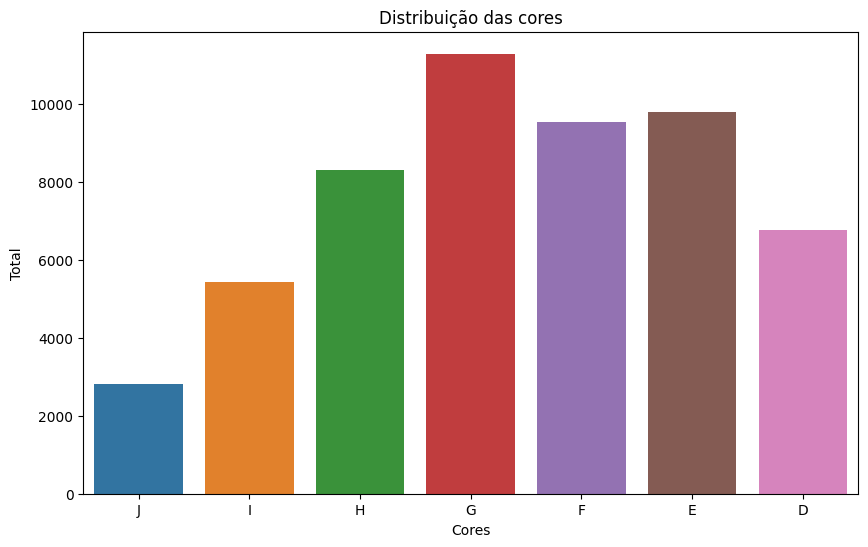

In [15]:
plt.figure(figsize=(10, 6))
sns.countplot(x='color', data=diamonds)
plt.title('Distribuição das cores')
plt.xlabel('Cores')
plt.ylabel('Total')
plt.show()

A cor mais presente no dataset é a cor intermediária (G), enquanto a cor que apresenta menos registros é a pior (J). 

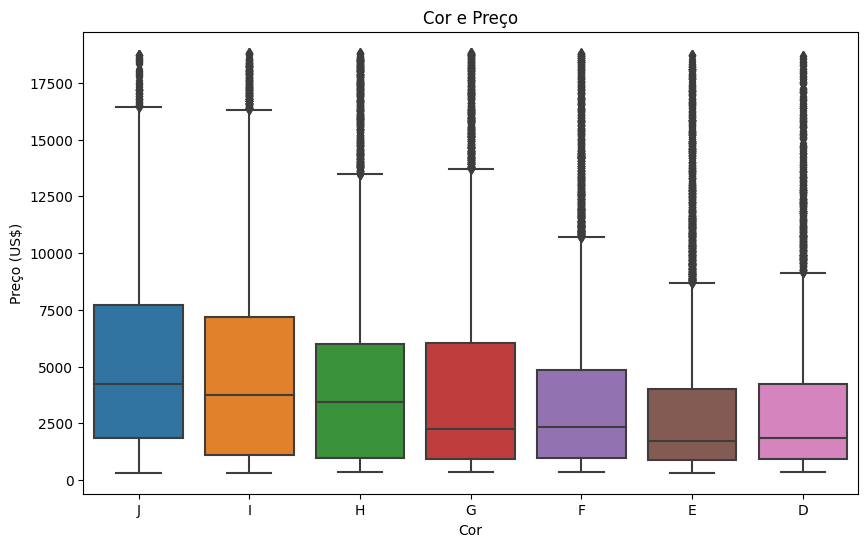

In [16]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='color', y='price', data=diamonds)
plt.title('Cor e Preço')
plt.xlabel('Cor')
plt.ylabel('Preço (US$)')
plt.show()

#### Ao analisar o boxplot que mostra a relação entre a cor dos diamantes (variável color) e o preço, podemos fazer as seguintes observações:
- Não há uma tendência clara de que cores mais próximas de D sejam significativamente mais caras. Do contrário, as cores E e D apresentaram os menores valores de mediana.
- Esperava que diamantes com cores mais próximas de D (melhor cor) tivessem preços mais altos, mas o gráfico não mostra claramente essa expectativa. A mediana do preço dos diamantes com cor J (pior cor), por exemplo, é maior do que a de diamantes com cor D.
- Embora a cor seja um fator importante na avaliação de um diamante, este gráfico sugere que ela não é o único fator determinante do preço. Outros atributos devem ser considerados para uma análise mais abrangente.

### Pergunta 5: Clareza (clarity) e o preço dos diamantes:

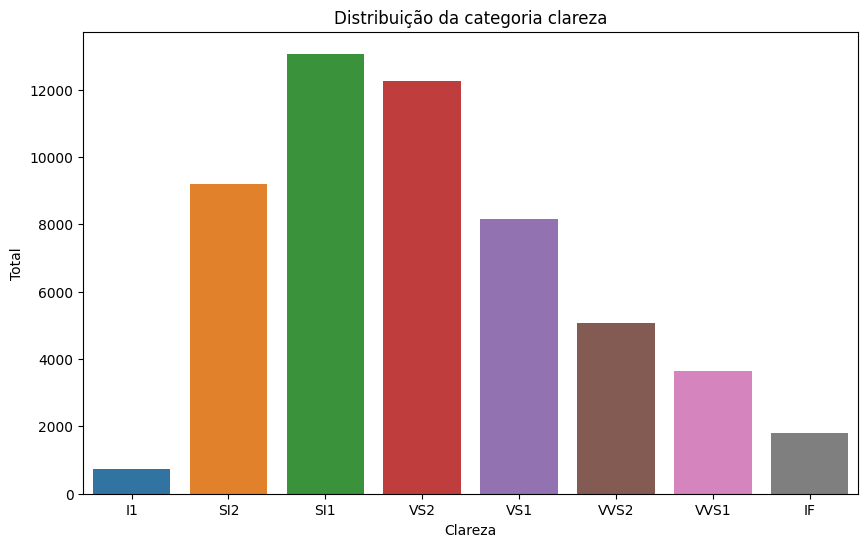

In [17]:
plt.figure(figsize=(10, 6))
sns.countplot(x='clarity', data=diamonds)
plt.title('Distribuição da categoria clareza')
plt.xlabel('Clareza')
plt.ylabel('Total')
plt.show()

A maior concentração de registros encontra-se entre SI2 e VS1, os diamantes de pior e melhor clareza ficam abaixo de 2000 registros ambos.

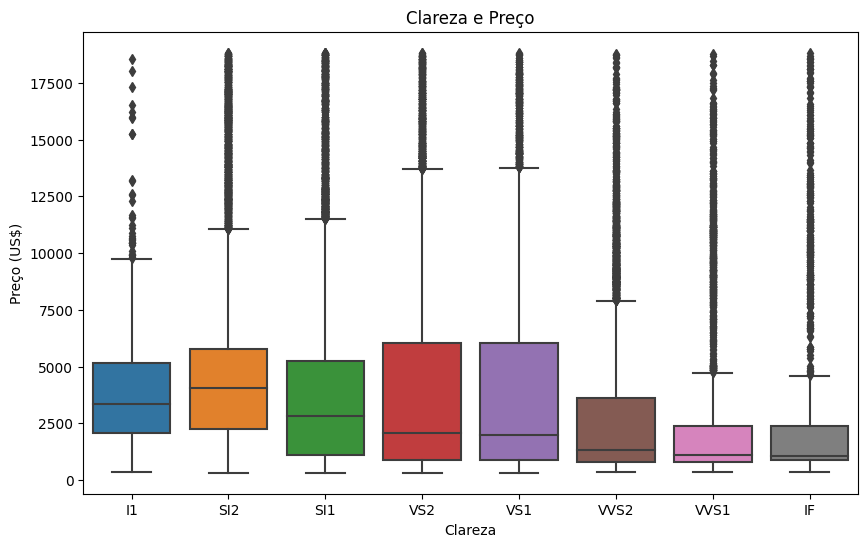

In [18]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='clarity', y='price', data=diamonds)
plt.title('Clareza e Preço')
plt.xlabel('Clareza')
plt.ylabel('Preço (US$)')
plt.show()

#### Ao analisar o gráfico mostrando a relação entre a clareza dos diamantes (clarity) e o preço, podemos deduzir:
- Não podemos dizer que diamantes com maior clareza são mais caros.
- A tendência do gráfico mostrou que quanto mais próximo a IF (diamantes com maior clareza) os valores são menores.
- Esperava que valores de maior clareza apresentassem um maior valor geral.

## 3. Insights
### Podemos verificar que:
- Há uma grande variabilidade no preço, o que sugere que múltiplos fatores influenciam o valor de um diamante.
- Existe uma clara correlação positiva entre o peso (carat) e o preço do diamante. Em geral, diamantes mais pesados tendem a ser mais caros. No entanto, a relação não é linear e há bastante dispersão, indicando que outros fatores também afetam o preço.
- As variáveis mais fortemente correlacionadas com o preço são o peso (carat), seguidas pelas dimensões físicas (x, y, z). Isso indica que, além do peso, as dimensões físicas do diamante desempenham um papel crucial na determinação do preço.